# Case study- Exploratory Data Analysis

## Introduction


This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding


The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

#### - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

#### - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

#### - The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

#### - All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

#### 1.  Approved: The Company has approved loan Application

#### 2.  Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

#### 3.  Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

#### 4.  Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Business Objectives


This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

# Importing required files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
appldata = pd.read_csv("application_data.csv")
appldata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
appldata.shape

(307511, 122)

In [4]:
appldata.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
appldata.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
appldata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Finding the total number of missing values descending

In [7]:
appldata.isna().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

#### Check for columns that has lesser missing values

In [8]:
less= appldata.isnull().sum()/len(appldata)*100

In [9]:
less.head(30)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                   65.990810
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000


#### Finding percentage of missing values

In [10]:
round(100* appldata.isnull().sum()/len(appldata),2).head(20)

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
FLAG_OWN_REALTY               0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT                    0.00
AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.09
NAME_TYPE_SUITE               0.42
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
NAME_HOUSING_TYPE             0.00
REGION_POPULATION_RELATIVE    0.00
DAYS_BIRTH                    0.00
DAYS_EMPLOYED                 0.00
DAYS_REGISTRATION             0.00
dtype: float64

# Removing columns with missing values greater than 50% 

In [11]:
appldata = appldata.loc[:,100*appldata.isnull().sum()/len(appldata)<50]

In [12]:
# Checking the shape of appldata after removing missing values

appldata.shape

(307511, 81)

# Accessing columns that have missing values 

In [13]:
appldata_columns = appldata.columns[appldata.isnull().any()].tolist()

In [14]:
appldata[appldata_columns].isnull().sum()*100/len(appldata)

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
DAYS_LAST_PHONE_CHANGE           0.000325
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13

In [15]:
# Many columns like AMT_ANNUITY, AMT_GOODS_PRICE etc have missing values that are less than 13%. 
#Let us solve missing values for one field at a time 

## AMT_ANNUITY

In [16]:
appldata["AMT_ANNUITY"].head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [17]:
appldata["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

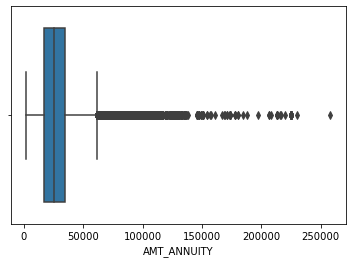

In [18]:
# Applying boxplot for the AMT_ANNUITY DATA 

sns.boxplot(appldata.AMT_ANNUITY)
plt.show()

In [19]:
# Calculating median for AMT_ANNUITY 

appldata["AMT_ANNUITY"].median()

24903.0

In [20]:
# Seeing the boxplot and median, we can impute that 24903 to be the median value in place of missing values

# AMT_GOODS_PRICE

In [21]:
appldata["AMT_GOODS_PRICE"].head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [22]:
appldata["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

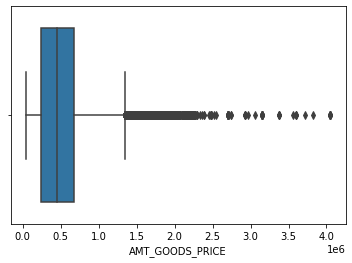

In [23]:
# Applying boxplot for AMT_ANNUITY 

sns.boxplot(appldata.AMT_GOODS_PRICE)
plt.show()

In [24]:
appldata["AMT_GOODS_PRICE"].median()

450000.0

In [25]:
# 450000 is the median value that can be imputed for the missing values of AMT_GOODS_PRICE 

# NAME_TYPE_SUITE

In [26]:
appldata["NAME_TYPE_SUITE"].head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [27]:
appldata["NAME_TYPE_SUITE"].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [28]:
# Being a categorical variable, we use mode to impute missing values 

appldata["NAME_TYPE_SUITE"].mode()

0    Unaccompanied
dtype: object

# CNT_FAM_MEMBERS 

In [29]:
appldata["CNT_FAM_MEMBERS"].head()

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [30]:
appldata["CNT_FAM_MEMBERS"].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

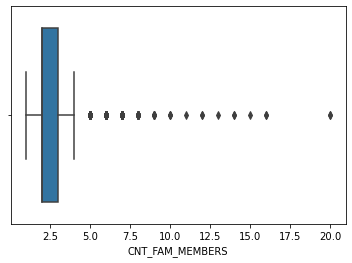

In [31]:
# Let us draw a boxplot for CNT_FAM_MEMBERS 

sns.boxplot(appldata.CNT_FAM_MEMBERS)
plt.show()

In [32]:
appldata["CNT_FAM_MEMBERS"].median()

2.0

In [33]:
# We can impute 2.0 as the missing values for the CNT_FAM_MEMBERS DATA 

# EXT_SOURCE_2

In [34]:
appldata["EXT_SOURCE_2"].head()

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64

In [35]:
appldata["EXT_SOURCE_2"].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

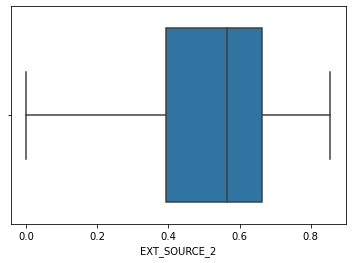

In [36]:
# Drawing a boxplot for the EXT_SOURCE_2

sns.boxplot(appldata.EXT_SOURCE_2)
plt.show()

In [37]:
appldata["EXT_SOURCE_2"].median()

0.5659614260608526

In [38]:
# We can impute 0.56596 as the missing value for EXT_SOURCE_2 column data

# CHECKING DATA TYPES OF ALL COLUMNS 

In [39]:
appldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [40]:
appldata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Finding count of unique values in each column 

In [41]:
appldata.nunique().sort_values().head(30)

FLAG_DOCUMENT_3                2
FLAG_PHONE                     2
FLAG_DOCUMENT_4                2
FLAG_DOCUMENT_2                2
REG_REGION_NOT_LIVE_REGION     2
REG_REGION_NOT_WORK_REGION     2
LIVE_REGION_NOT_WORK_REGION    2
REG_CITY_NOT_LIVE_CITY         2
REG_CITY_NOT_WORK_CITY         2
LIVE_CITY_NOT_WORK_CITY        2
FLAG_DOCUMENT_14               2
FLAG_DOCUMENT_13               2
FLAG_DOCUMENT_12               2
FLAG_DOCUMENT_11               2
FLAG_DOCUMENT_10               2
FLAG_DOCUMENT_9                2
FLAG_DOCUMENT_8                2
FLAG_DOCUMENT_7                2
EMERGENCYSTATE_MODE            2
FLAG_DOCUMENT_6                2
FLAG_CONT_MOBILE               2
FLAG_WORK_PHONE                2
FLAG_EMAIL                     2
FLAG_MOBIL                     2
TARGET                         2
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
FLAG_DOCUMENT_21               2
FLAG_DOCUMENT_20               2
dtype: int

# Converting negative age and date related data 

In [42]:
# Converting negative days_birth to positive values 

appldata["DAYS_BIRTH"]= appldata["DAYS_BIRTH"].abs()

In [43]:
# Converting negative DAYS_EMPLOYED value to positive values

appldata["DAYS_EMPLOYED"]= appldata["DAYS_EMPLOYED"].abs()

In [44]:
# Converting negative DAYS_REGISTRATION value to positive values 

appldata["DAYS_REGISTRATION"]= appldata["DAYS_REGISTRATION"].abs()

In [45]:
# Converting negative DAYS_ID_PUBLISHED value to positive values 

appldata["DAYS_ID_PUBLISH"] = appldata["DAYS_ID_PUBLISH"].abs()

In [46]:
# Converting negative DAYS_LAST_PHONE_CHANGE to positive values 

appldata["DAYS_LAST_PHONE_CHANGE"]= appldata["DAYS_LAST_PHONE_CHANGE"].abs()

In [47]:
appldata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Converting Columns integer to categorical 

In [48]:
for col in appldata.columns:
    if appldata[col].nunique()<=3:
        appldata[col]=appldata[col].astype(object)

In [49]:
# We are converting integer columns to categorical where there are 3 unique values are categorical variables

In [50]:
appldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [51]:
appldata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# So far there are no columns that are greater than 3 that are wrongly read as int/float data type 

# CHECKING FOR OUTLIERS FOR ATLEAST 5 NUMERICAL COLUMNS 

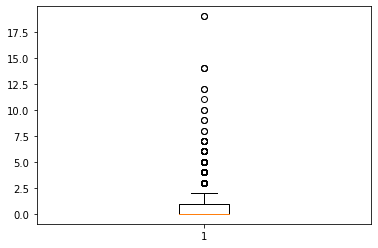

The values greater than 2.5 are considered to be outliers


In [53]:
# CNT_CHILDREN 

plt.boxplot(appldata["CNT_CHILDREN"])
plt.show()

# In the boxplots, the values above upper whiskers and below lower whiskers are considered as outliers
# Calculating Interquartile range 

Q1 = appldata["CNT_CHILDREN"].quantile(0.25)
Q3 = appldata["CNT_CHILDREN"].quantile(0.75)

IQR = Q3 - Q1 

lowerwhisker = (Q1 - 1.5 * IQR)
upperwhisker = (Q3 + 1.5 * IQR)

# As outliers are present after the upper whiskers, we are considering upper whiskers for calculation

print("The values greater than {} are considered to be outliers".format(upperwhisker))

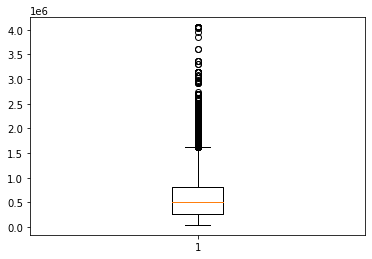

The values greater than 1616625.0 are considered to be outliers


In [54]:
# AMT_CREDIT 

plt.boxplot(appldata["AMT_CREDIT"])
plt.show()

# In the boxplots, the values above upper whiskers and below lower whiskers are considered as outliers
# Calculating Interquartile range 

Q1 = appldata["AMT_CREDIT"].quantile(0.25)
Q3 = appldata["AMT_CREDIT"].quantile(0.75)

IQR = Q3 - Q1 

lowerwhisker = (Q1 - 1.5 * IQR)
upperwhisker = (Q3 + 1.5 * IQR)

# As outliers are present after the upper whiskers, we are considering upper whiskers for calculation

print("The values greater than {} are considered to be outliers".format(upperwhisker))

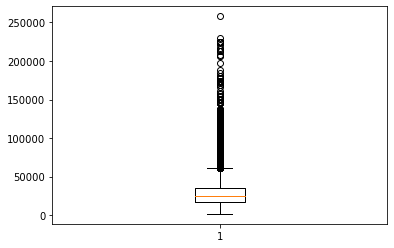

The values greater than 61704.0 are considered to be outliers


In [55]:
# AMT_ANNUITY 

data = appldata["AMT_ANNUITY"]
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()

# In the boxplots, the values above upper whiskers and below lower whiskers are considered as outliers
# Calculating Interquartile range 

Q1 = appldata["AMT_ANNUITY"].quantile(0.25)
Q3 = appldata["AMT_ANNUITY"].quantile(0.75)

IQR = Q3 - Q1 

lowerwhisker = (Q1 - 1.5 * IQR)
upperwhisker = (Q3 + 1.5 * IQR)

# As outliers are present after the upper whiskers, we are considering upper whiskers for calculation

print("The values greater than {} are considered to be outliers".format(upperwhisker))

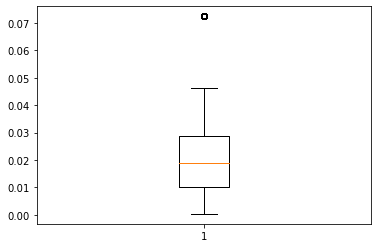

The values greater than 0.056648500000000004 are considered to be outliers


In [56]:
# Region Population Relative

plt.boxplot(appldata["REGION_POPULATION_RELATIVE"])
plt.show()

# In the boxplots, the values above upper whiskers and below lower whiskers are considered as outliers
# Calculating Interquartile range 

Q1 = appldata["REGION_POPULATION_RELATIVE"].quantile(0.25)
Q3 = appldata["REGION_POPULATION_RELATIVE"].quantile(0.75)

IQR = Q3 - Q1 

lowerwhisker = (Q1 - 1.5 * IQR)
upperwhisker = (Q3 + 1.5 * IQR)

# As outliers are present after the upper whiskers, we are considering upper whiskers for calculation

print("The values greater than {} are considered to be outliers".format(upperwhisker))

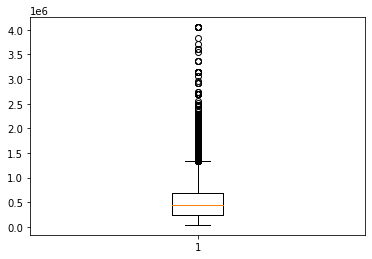

The values greater than 1341000.0 are considered to be outliers


In [57]:
# AMT_GOODS_PRICE 

data = appldata["AMT_GOODS_PRICE"]
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()

# In the boxplots, the values above upper whiskers and below lower whiskers are considered as outliers
# Calculating Interquartile range 

Q1 = appldata["AMT_GOODS_PRICE"].quantile(0.25)
Q3 = appldata["AMT_GOODS_PRICE"].quantile(0.75)

IQR = Q3 - Q1 

lowerwhisker = (Q1 - 1.5 * IQR)
upperwhisker = (Q3 + 1.5 * IQR)

# As outliers are present after the upper whiskers, we are considering upper whiskers for calculation

print("The values greater than {} are considered to be outliers".format(upperwhisker))

In [58]:
appldata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Binning continuous variables 

In [59]:
# AMT_INCOME_TOTAL 

q1 = appldata["AMT_INCOME_TOTAL"].quantile(0.25)
q2 = appldata["AMT_INCOME_TOTAL"].quantile(0.50)
q3 = appldata["AMT_INCOME_TOTAL"].quantile(0.75)
m = appldata["AMT_INCOME_TOTAL"].max()

# Let us bin AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bins

appldata["AMT_INCOME_TOTAL_bins"] = pd.cut(appldata["AMT_INCOME_TOTAL"], [q1, q2, q3,m], labels = ["Low", "Medium", "High"])
appldata["AMT_INCOME_TOTAL_bins"].value_counts()

Medium    82213
High      71538
Low       53182
Name: AMT_INCOME_TOTAL_bins, dtype: int64

In [60]:
# AMT_CREDIT 

q1 = appldata["AMT_CREDIT"].quantile(0.25)
q2 = appldata["AMT_CREDIT"].quantile(0.50)
q3 = appldata["AMT_CREDIT"].quantile(0.75)
m = appldata["AMT_CREDIT"].max()

# Let us bin AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bins

appldata["AMT_CREDIT_bins"] = pd.cut(appldata["AMT_CREDIT"], [q1, q2, q3,m], labels = ["Low", "Medium", "High"])
appldata["AMT_CREDIT_bins"].value_counts()

Medium    77786
High      75876
Low       75428
Name: AMT_CREDIT_bins, dtype: int64

# INITIATING ANALYSIS 

In [61]:
appldata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bins,AMT_CREDIT_bins
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


# Checking the Imbalance percentage 

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


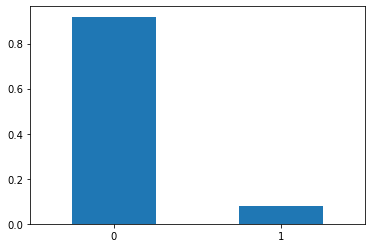

In [62]:
#Checking the imbalance percentage.
print(100*appldata.TARGET.value_counts()/ len(appldata))
(appldata.TARGET.value_counts()/ len(appldata)).plot.bar()
plt.xticks(rotation=0)
plt.show()
# In application_data there is 91.927118% of "not default" customers 
# and 8.072882% of "default" customers.
# Hence, this is not a balanced data set 

In [63]:
# LET US DIVIDE THE MOST IMPORTANT TARGET DATASET INTO TWO PARTS FOR UNIVARIATE ANALYSIS 

appldata_1 = appldata[appldata["TARGET"]==1]
appldata_0 = appldata[appldata["TARGET"]==0]

# UNIVARIATE ANALYSIS 

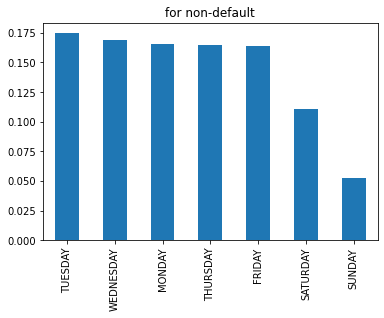

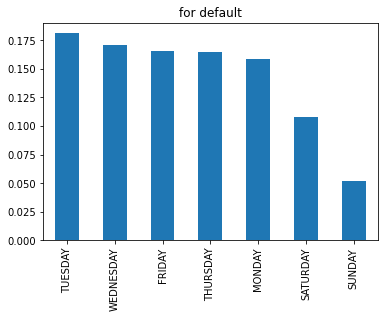

In [64]:
# WEEKDAY_APPR PROCESS_START 


appldata_0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()

appldata_1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()

In [65]:
# Application processes are generally less during Saturdays and Sundays for defaulters and non-defaulters 

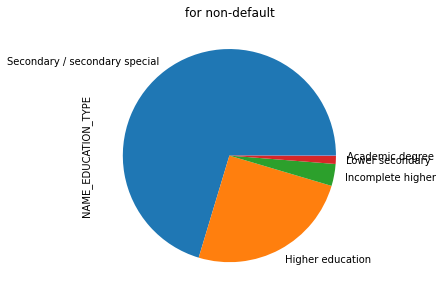

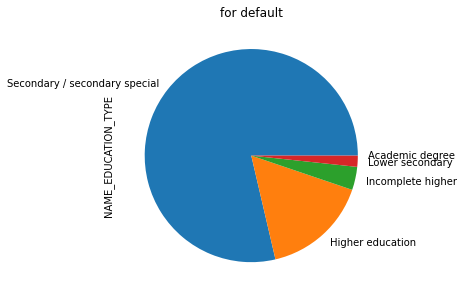

In [66]:
# NAME_EDUCATION_TYPE 

appldata_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('for non-default')
plt.show()

appldata_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('for default')
plt.show()

In [67]:
# For both target = 0 and 1, secondary/Special educated people are applying high in numbers 

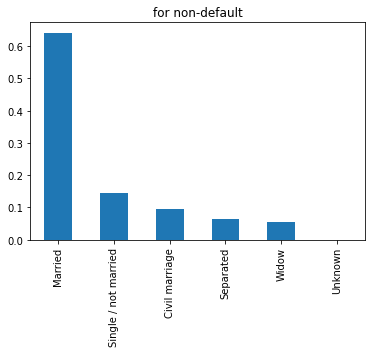

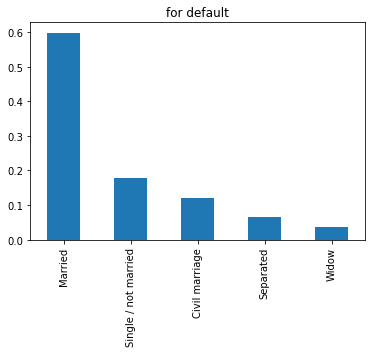

In [68]:
#NAME_FAMILY_STATUS

appldata_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()

appldata_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()

In [69]:
# Married people tend to take more loans compared to other categories, whether they are defaulters or non-deafulters

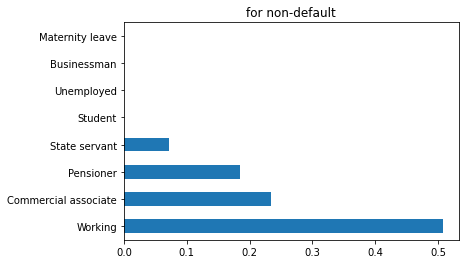

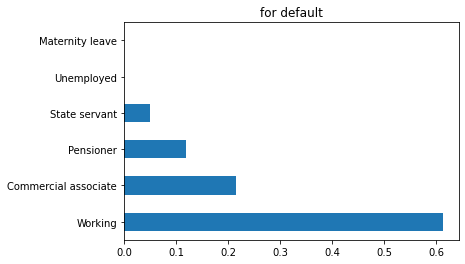

In [70]:
#NAME_INCOME_TYPE

appldata_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

appldata_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()

In [71]:
# Pensioners are high in not default cases and low in default cases. 
# Majority of income type of defaulters is working 

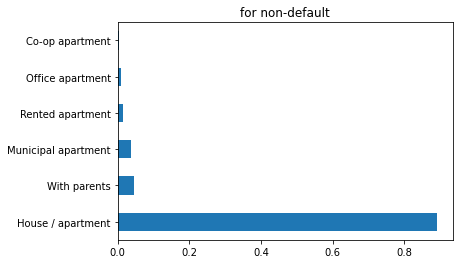

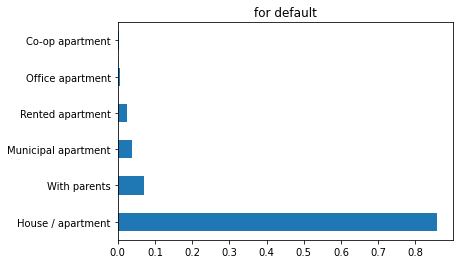

In [72]:
# NAME_HOUSING_TYPE

appldata_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

appldata_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()

In [73]:
# People who own house or apartment are high in default and non-default loan cases

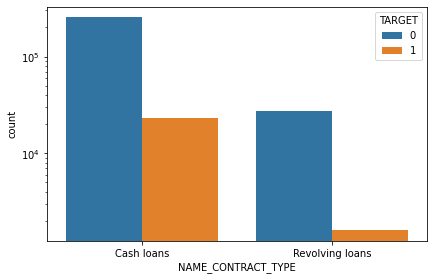

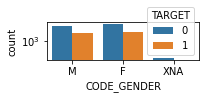

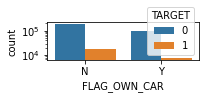

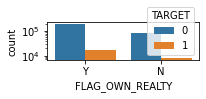

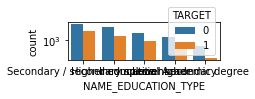

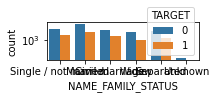

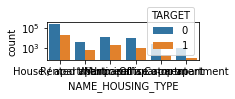

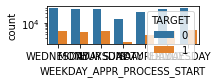

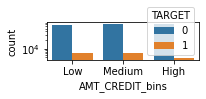

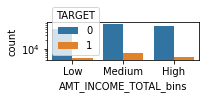

In [74]:
# Comparing Target variable with categorical variables of target 0 and 1 

categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                     'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'WEEKDAY_APPR_PROCESS_START','AMT_CREDIT_bins','AMT_INCOME_TOTAL_bins']

plt.figure(figsize=(15,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=appldata)
    plt.yscale('log')
    plt.show()

# Comments on univariate categorical analysis 

1. Females take more loans compared to males 
2. Banks are less busy on Saturdays and Sundays for loan application. 
3. Customers with high credit amounts have lesser chances of defaulting loans 
4. Customers who deal with real estate tend to take more loans
5. Customers who don't own a car for themselves have more chances of applying for loans 

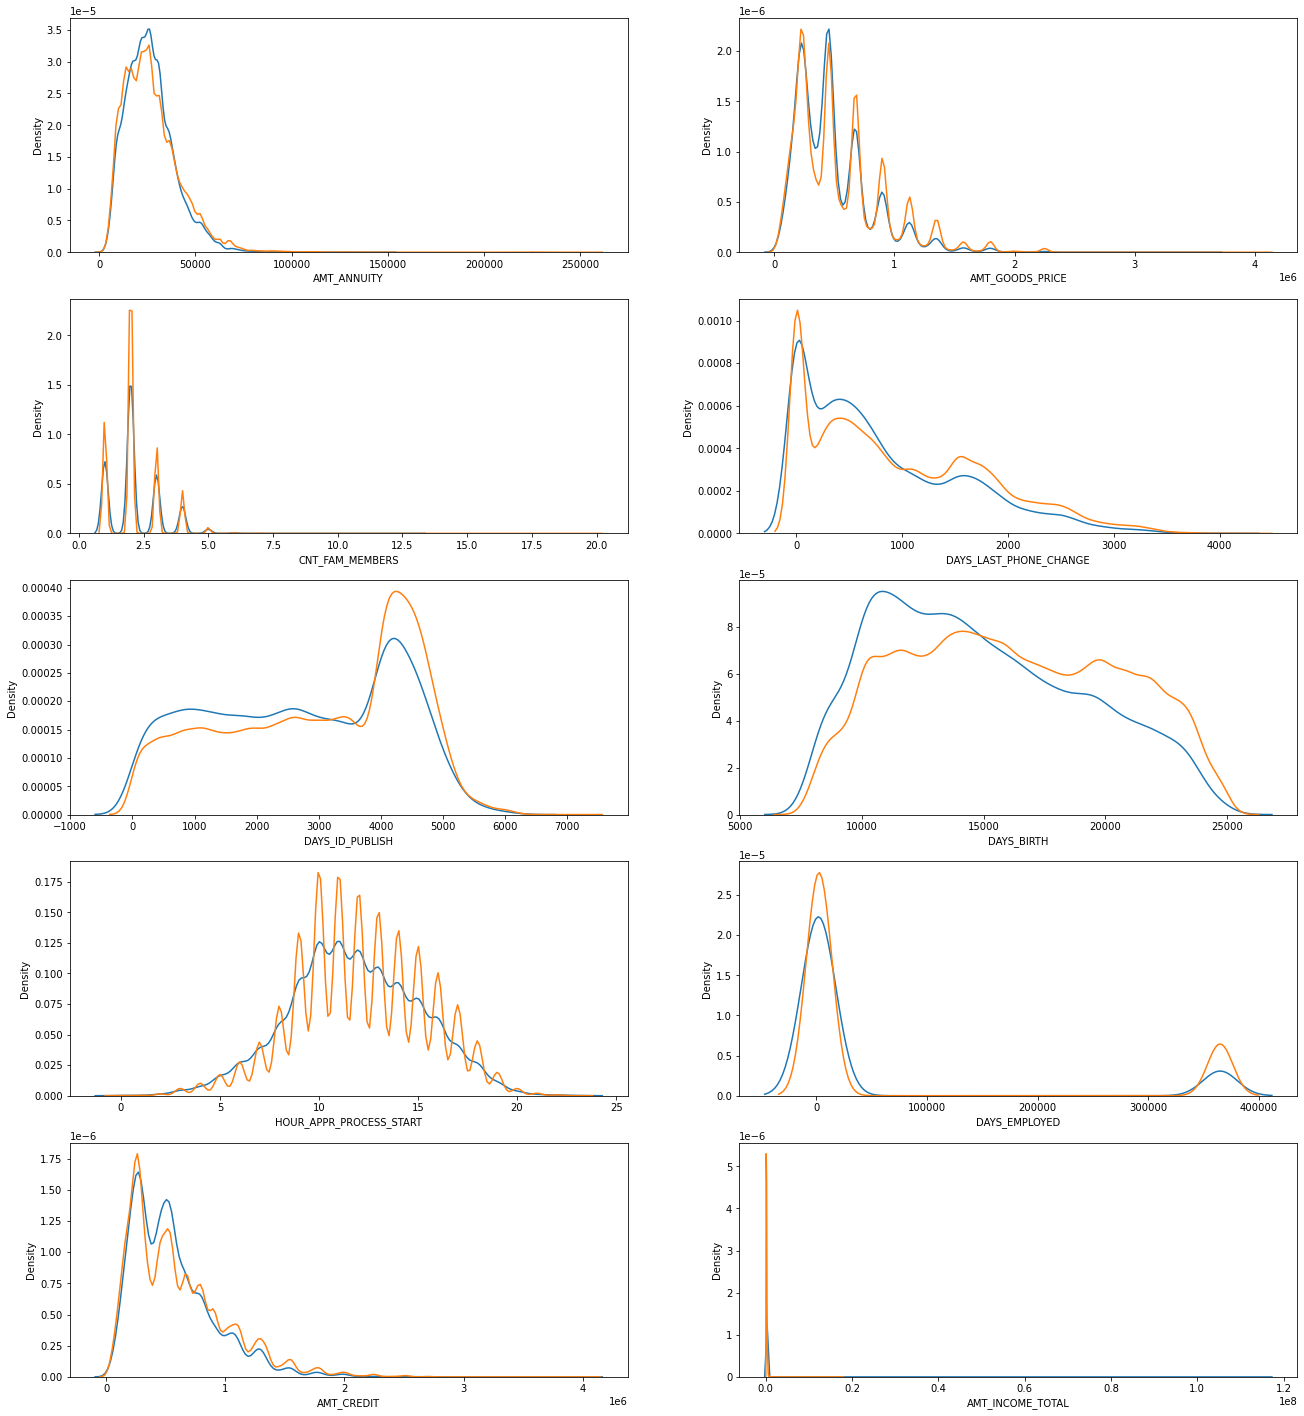

In [75]:
# Comparing target variable with numerical variables for target variables of 0 and 1 

continous_columns=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                  'DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(appldata_1[i[1]].dropna(),hist=False,label='Target : default')
    sns.distplot(appldata_0[i[1]].dropna(),hist=False,label='Target : no default')
plt.show()    

# Insights from the univariate analysis


1. Customers with low income have greater likelihood to default loan payments 
2. The highest number of loan applications are made between 10 am to 2 pm
3. Customers between the ages of 27 to 41 are more likely to apply for loans 
4. Customers take more loans for less goods amount 

In [77]:
# CORRELATION FOR NUMERICAL COLUMNS FOR TARGET VARIABLES OF 0 AND 1 

# appldata_1 

appldata_1.corr().unstack().reset_index().sort_values(by=0, ascending=False)

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,1.000000
578,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MODE,1.000000
102,AMT_CREDIT,AMT_CREDIT,1.000000
136,AMT_ANNUITY,AMT_ANNUITY,1.000000
170,AMT_GOODS_PRICE,AMT_GOODS_PRICE,1.000000
...,...,...,...
41,CNT_CHILDREN,DAYS_EMPLOYED,-0.192864
242,DAYS_BIRTH,CNT_FAM_MEMBERS,-0.203267
370,CNT_FAM_MEMBERS,DAYS_BIRTH,-0.203267
40,CNT_CHILDREN,DAYS_BIRTH,-0.259109


# Finding top 10 correlated values for defaulters or TARGET ==1 

In [78]:
corr=appldata_1.corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=round(corrdf['Coorelation'],2)
corrdf['Coorelation']=abs(corrdf['Coorelation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

,Var1,Var2,Coorelation
642,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00
676,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
678,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
168,AMT_GOODS_PRICE,AMT_CREDIT,0.98
576,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
644,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98
364,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87


# Finding top 10 correlated values for non-defaulters or TARGET==0

In [79]:
corr=appldata_0.corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=round(corrdf['Coorelation'],2)
corrdf['Coorelation']=abs(corrdf['Coorelation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

,Var1,Var2,Coorelation
676,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
678,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
168,AMT_GOODS_PRICE,AMT_CREDIT,0.99
610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
642,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
576,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97
644,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.96
364,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86


# Comments on correlations 


1. The values for YEARS_BEGINEXPLUATATION_MEDI and YEARS_BEGINEXPLUATATION_AVG are highly correlated in default case than non-default


# Bivariate Analysis 

In [81]:
appldata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bins,AMT_CREDIT_bins
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


# Bi-variate categorical plots

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       255011            27675
1                        23221             1604


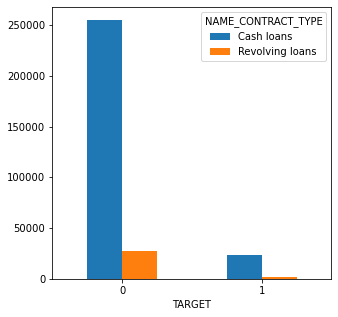

In [82]:
tab1= pd.crosstab(index=appldata['TARGET'],columns=appldata['NAME_CONTRACT_TYPE'])
print(tab1)
tab1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

In [83]:
# High number of cash loans have been disbursed 

CODE_GENDER       F      M  XNA
TARGET                         
0            188278  94404    4
1             14170  10655    0


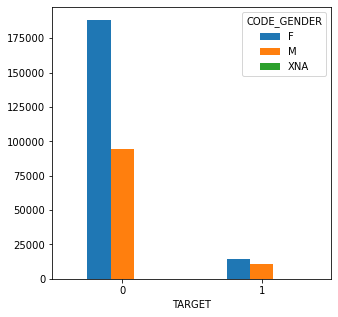

In [84]:
tab2= pd.crosstab(index=appldata['TARGET'],columns=appldata['CODE_GENDER'])
print(tab2)
tab2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

In [85]:
# Females take more loans compared to males 

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  \
TARGET                                                                 
0                    3026   37140              248      790     1596   
1                     241    3009               23       76      174   

NAME_TYPE_SUITE  Spouse, partner  Unaccompanied  
TARGET                                           
0                          10475         228189  
1                            895          20337  


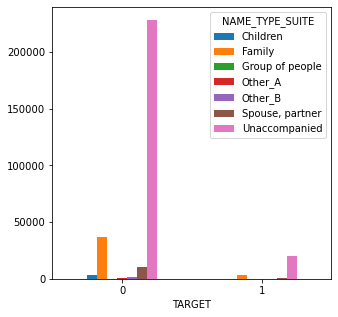

In [86]:
tab3= pd.crosstab(index=appldata['TARGET'],columns=appldata['NAME_TYPE_SUITE'])
print(tab3)
tab3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

In [87]:
# Unaccompanied people take more loans 

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                     52380          20454       18          14   143550  
1                      2982           1249        0           8    15224  


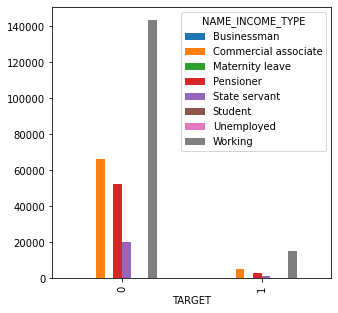

In [88]:
tab4= pd.crosstab(index=appldata['TARGET'],columns=appldata['NAME_INCOME_TYPE'])
print(tab4)
tab4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

In [89]:
# Working professionals take more loans compared to customers from other occupations

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET                                                                       
0                             1033             251596                10228   
1                               89              21272                  955   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET                                                               
0                              2445              4280         13104  
1                               172               601          1736  


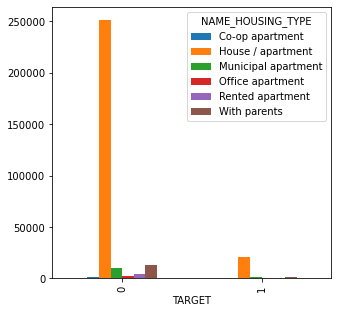

In [90]:
tab5= pd.crosstab(index=appldata['TARGET'],columns=appldata['NAME_HOUSING_TYPE'])
print(tab5)
tab5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

In [91]:
# People who have house or apartment take more loans compared to customers having other housing types 

# Bi-variate continuous plots 

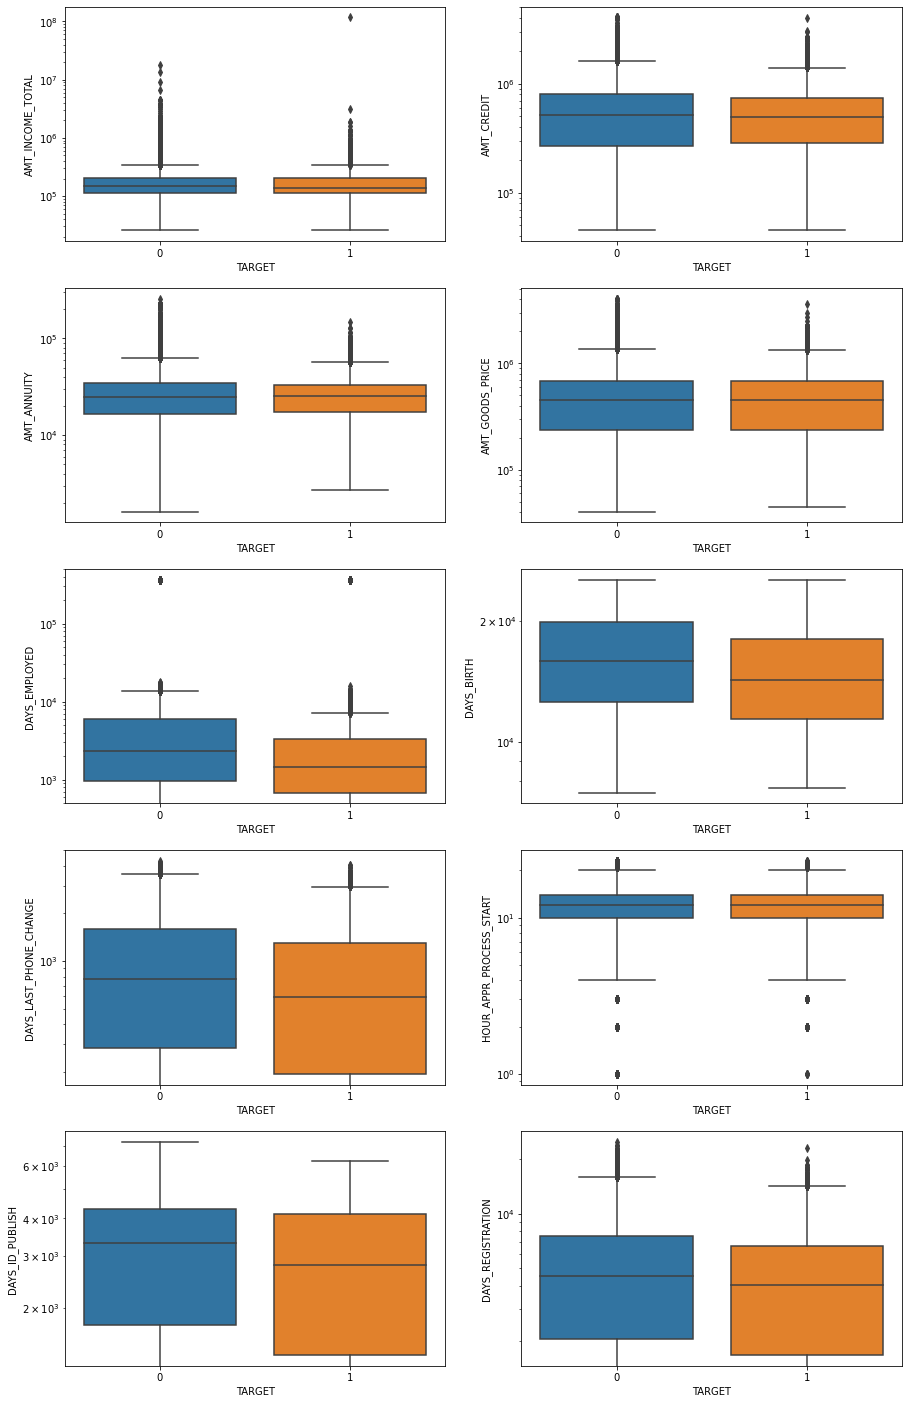

In [92]:
continous_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=appldata[i[1]].dropna(),data=appldata)
    plt.yscale('log')
plt.show() 

# Comments on Bi-variate continuous plots 


1. People with less total income are majorly becoming defaulters 
2. Customers with higher number of employments have greater likelihood to default paying loans
3. The time taken to publish IDs are higher for non-default clients 
4. The start hours of loan approval is the same for defaulters and non-defaulters
5. When credit amount is greater than 50000, customers are less likely to default paying loans


# Importing previous_appldata 

In [94]:
previous_appldata = pd.read_csv("previous_application.csv")
previous_appldata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
previous_appldata.shape

(1670214, 37)

In [96]:
previous_appldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [97]:
previous_appldata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Checking the percentage of missing values 

In [98]:
round((100*previous_appldata.isnull().sum()/len(previous_appldata)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [99]:
len(previous_appldata)

1670214

# Removing columns that have missing values greater than 50%

In [100]:
previous_appldata=previous_appldata.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis = 1)

In [101]:
previous_appldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

# Converting negative values into positive values 

In [102]:
previous_appldata['DAYS_DECISION']=previous_appldata['DAYS_DECISION'].abs()
previous_appldata['SELLERPLACE_AREA']=previous_appldata['SELLERPLACE_AREA'].abs()
previous_appldata['DAYS_FIRST_DUE']=previous_appldata['DAYS_FIRST_DUE'].abs()
previous_appldata['DAYS_LAST_DUE_1ST_VERSION']=previous_appldata['DAYS_LAST_DUE_1ST_VERSION'].abs()
previous_appldata['DAYS_LAST_DUE']=previous_appldata['DAYS_LAST_DUE'].abs()
previous_appldata['DAYS_TERMINATION']=previous_appldata['DAYS_TERMINATION'].abs()
previous_appldata['DAYS_FIRST_DRAWING']=previous_appldata['DAYS_FIRST_DRAWING'].abs()

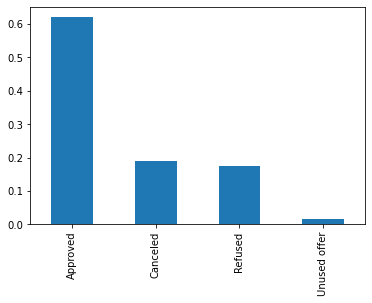

In [103]:
(previous_appldata.NAME_CONTRACT_STATUS.value_counts()/len(previous_appldata)).plot.bar()
plt.show()

# Merging previous_appldata and appldata 

In [104]:
merged_table = pd.merge(appldata, previous_appldata, how="left", on="SK_ID_CURR", suffixes = ("_Current", "_Previous"))

In [105]:
merged_table.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


# Univariate Analysis- Categorical 

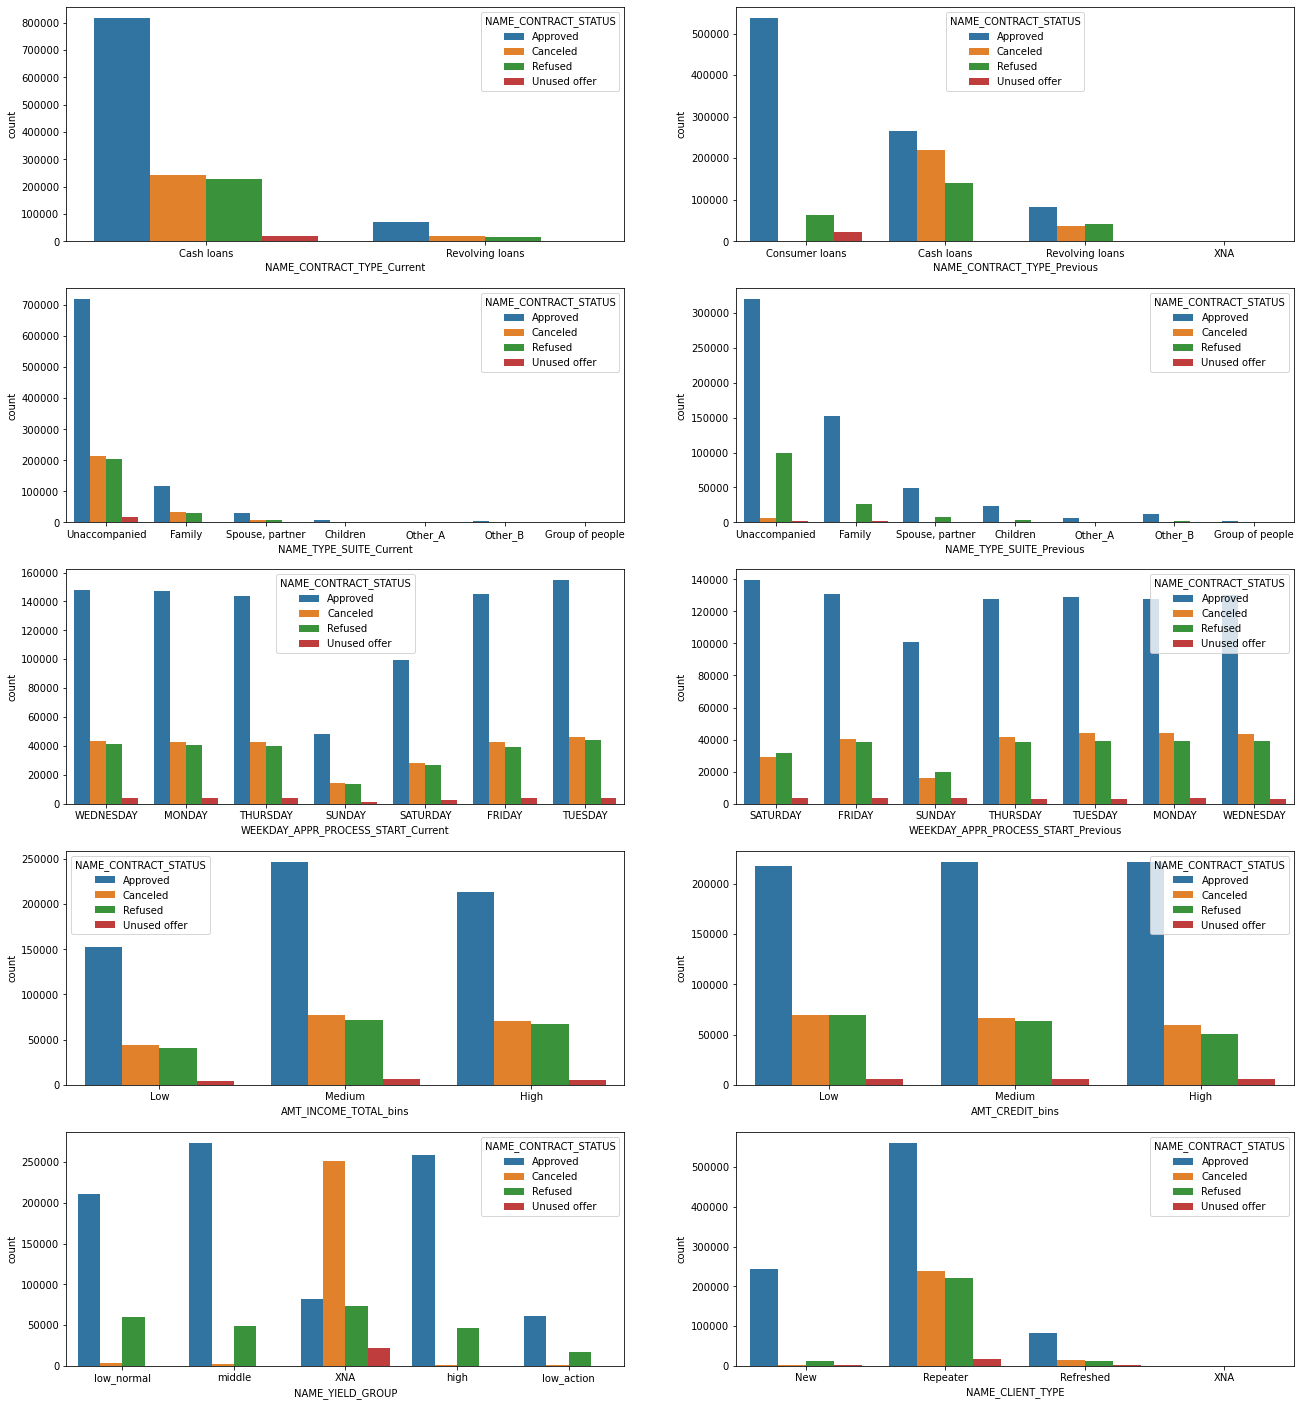

In [106]:
categorical_columns=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous',
                     'NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous',
                     'WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous',
                    'AMT_INCOME_TOTAL_bins','AMT_CREDIT_bins','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']


plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_table)
    #lt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()

# Comments on Univariate analysis-Categorical 

1. The highest number of approved loans go to repeaters 
2. Maximum approval processes start during Tuesdays but previously it started during Saturday
3. In the current and previous data, the unaccompanied gets the highest number of loan approvals



# Univariate Analysis- Numerical 

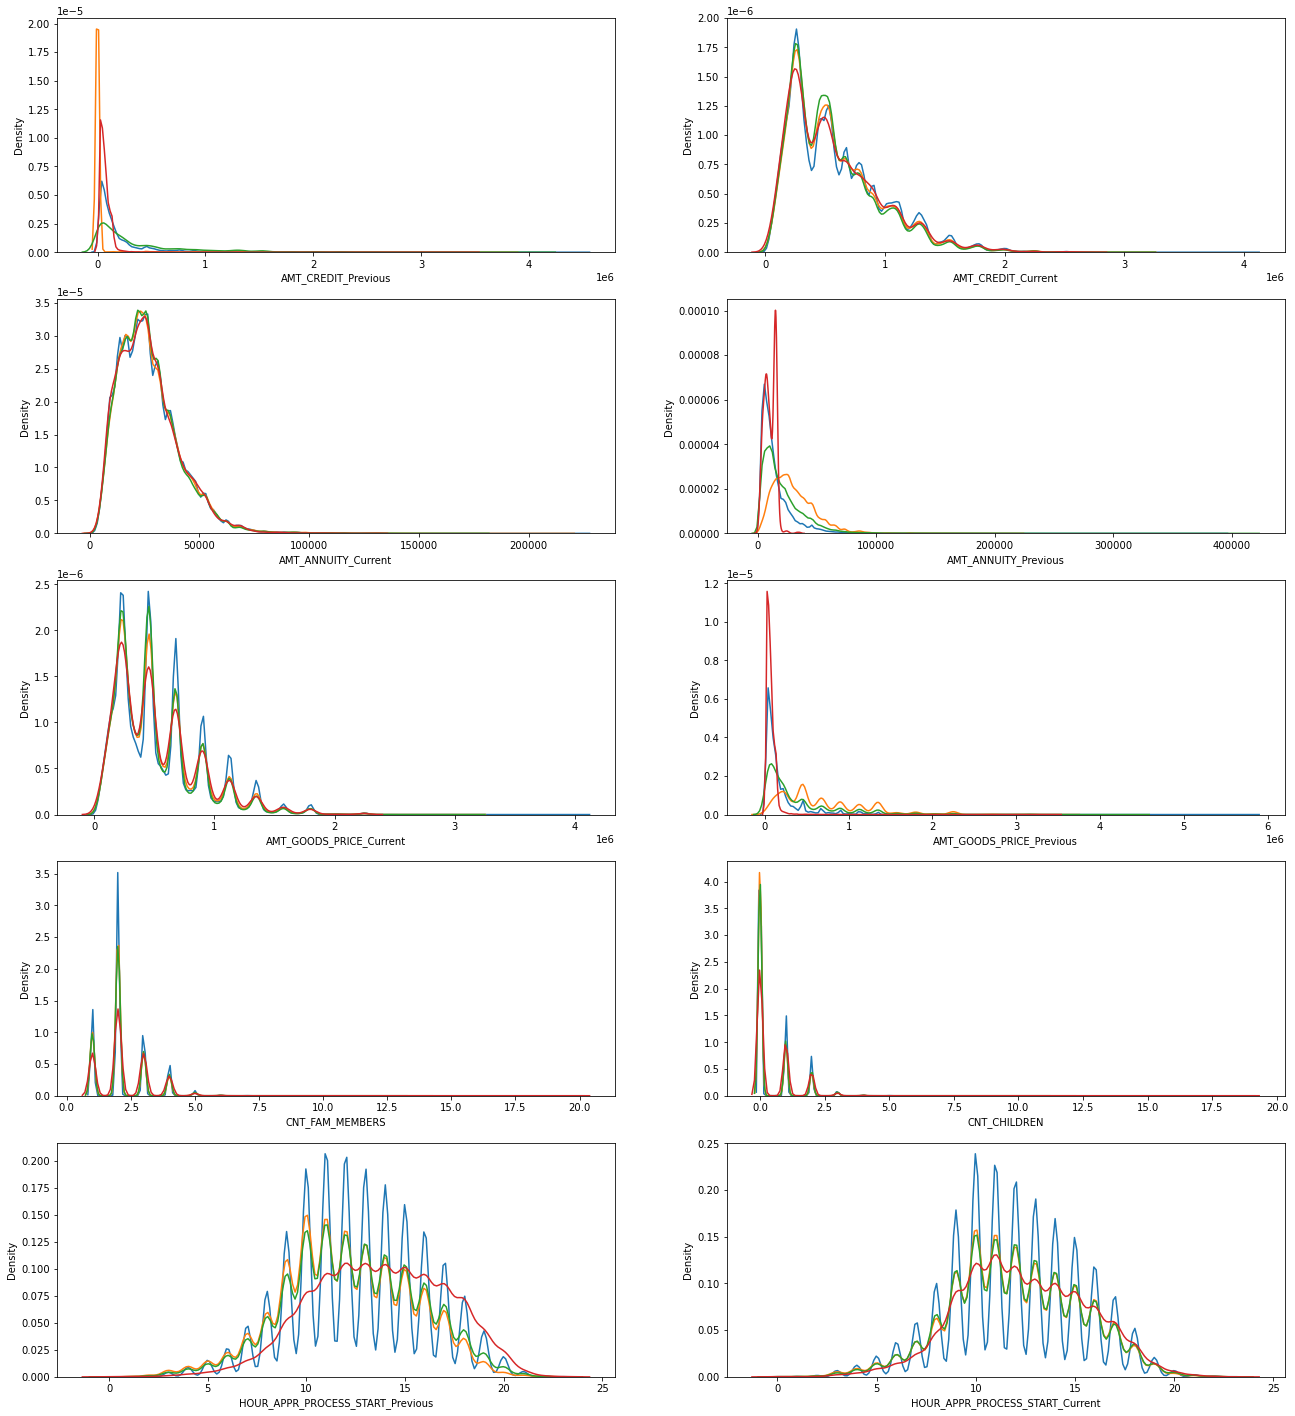

In [108]:
continous_columns=['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(merged_table.loc[merged_table.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved')
    sns.distplot(merged_table.loc[merged_table.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled',kde_kws={'bw':0.1})
    sns.distplot(merged_table.loc[merged_table.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused',kde_kws={'bw':0.1})
    # we added kde_kws={'bw':0.1} in parameter to overcome bandwidth limitation.
    sns.distplot(merged_table.loc[merged_table.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer')

plt.show() 

# Comments on Univariate analysis numerical 

1. For both appl_data and previous_appldata, the maximum number of applications have been filed between 9 am to 2pm
2. Hence, busiest or peak hours for banks are 9 am to 2 pm
3. Nuclear families take more loans 

# Bi-variate Analysis- Categorical 

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


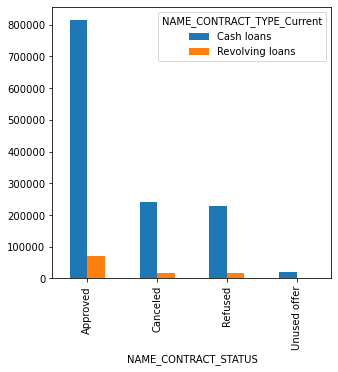

In [109]:
tab6= pd.crosstab(index=merged_table['NAME_CONTRACT_STATUS'],columns=merged_table['NAME_CONTRACT_TYPE_Current'])
print(tab6)
tab6.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

In [ ]:
# The highest approved loans are the cash loans 

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  \
NAME_CONTRACT_STATUS                                                     
Approved                            198507               10     170144   
Canceled                             59785                2      57674   
Refused                              58117                3      43802   
Unused offer                          5072                1       1924   

NAME_INCOME_TYPE      State servant  Student  Unemployed  Working  
NAME_CONTRACT_STATUS                                               
Approved                      61630       20          68   455720  
Canceled                      15679        3          16   126282  
Refused                       15597        1          38   127832  
Unused offer                   1518        0           1    14255  


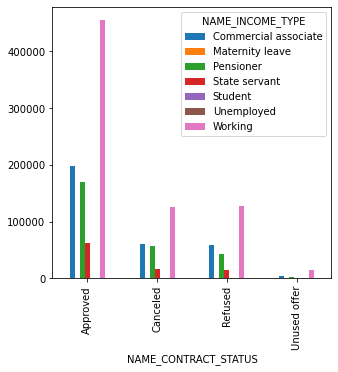

In [110]:
tab9= pd.crosstab(index=merged_table['NAME_CONTRACT_STATUS'],columns=merged_table['NAME_INCOME_TYPE'])
print(tab9)
tab9.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

In [ ]:
# The working professionals are the highest number of applicants 

NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  \
NAME_CONTRACT_STATUS                                                         
Approved                          418            195002              27676   
Canceled                           64             57074               7917   
Refused                            91             54051               8635   
Unused offer                        6              6718                983   

NAME_EDUCATION_TYPE   Lower secondary  Secondary / secondary special  
NAME_CONTRACT_STATUS                                                  
Approved                        10929                         652074  
Canceled                         3099                         191287  
Refused                          2971                         179642  
Unused offer                      165                          14899  


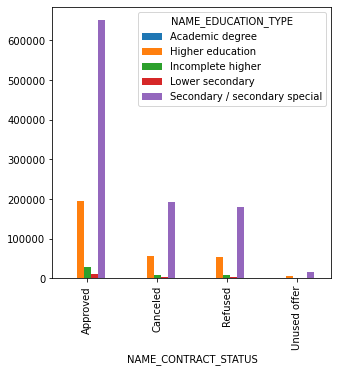

In [111]:
tab10= pd.crosstab(index=merged_table['NAME_CONTRACT_STATUS'],columns=merged_table['NAME_EDUCATION_TYPE'])
print(tab10)
tab10.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

In [ ]:
# The customers with secondary or special education has the highest number of loan approvals 

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
NAME_CONTRACT_STATUS                                       
Approved                       86827   577137      56750   
Canceled                       26143   167233      16535   
Refused                        28226   152167      16453   
Unused offer                    1961    14373       1600   

NAME_FAMILY_STATUS    Single / not married  Widow  
NAME_CONTRACT_STATUS                               
Approved                            114880  50505  
Canceled                             33403  16127  
Refused                              34292  14252  
Unused offer                          4082    755  


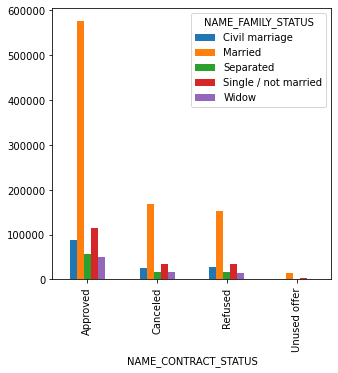

In [112]:
tab11= pd.crosstab(index=merged_table['NAME_CONTRACT_STATUS'],columns=merged_table['NAME_FAMILY_STATUS'])
print(tab11)
tab11.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

In [ ]:
# The married customers have the highest number of loan approvals 

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_CONTRACT_STATUS                                                            
Approved                         2788             791667                33138   
Canceled                          629             234120                 9149   
Refused                           659             219301                 8544   
Unused offer                      313              19864                  702   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_CONTRACT_STATUS                                                    
Approved                          7319             12608         38579  
Canceled                          1926              3385         10232  
Refused                           2005              3514         11367  
Unused offer                       178               278          1436  


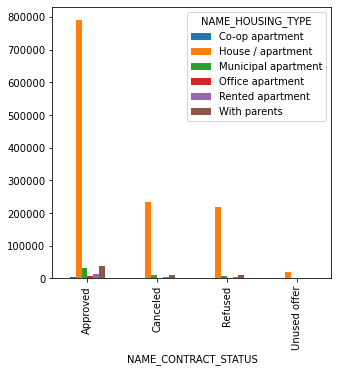

In [113]:
tab12= pd.crosstab(index=merged_table['NAME_CONTRACT_STATUS'],columns=merged_table['NAME_HOUSING_TYPE'])
print(tab12)
tab12.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

In [ ]:
# The house or apartments owners hold the highest number of loan approvals 

NAME_CONTRACT_TYPE_Previous  Cash loans  Consumer loans  Revolving loans  XNA
NAME_CONTRACT_STATUS                                                         
Approved                         266381          537310            82408    0
Canceled                         220383            1329            37445  284
Refused                          139568           64282            41511   29
Unused offer                        432           22335                4    0


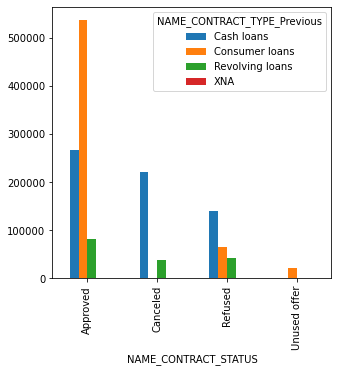

In [114]:
tab15= pd.crosstab(index=merged_table['NAME_CONTRACT_STATUS'],columns=merged_table['NAME_CONTRACT_TYPE_Previous'])
print(tab15)
tab15.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

In [ ]:
# Consumer loans holds the highest number of approvals 

NAME_CLIENT_TYPE         New  Refreshed  Repeater  XNA
NAME_CONTRACT_STATUS                                  
Approved              242395      82891    560378  435
Canceled                2920      16104    239618  799
Refused                12358      12537    220215  280
Unused offer            1867       3404     17471   29


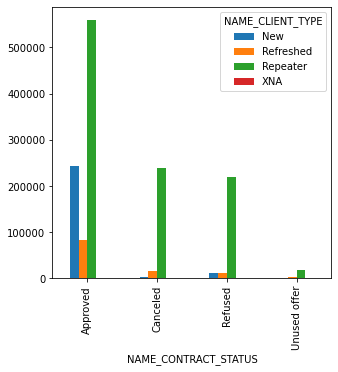

In [115]:
tab17= pd.crosstab(index=merged_table['NAME_CONTRACT_STATUS'],columns=merged_table['NAME_CLIENT_TYPE'])
print(tab17)
tab17.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

In [ ]:
# The repeated applications received the most number of loan approvals 

# Bivariate analysis - Numerical 

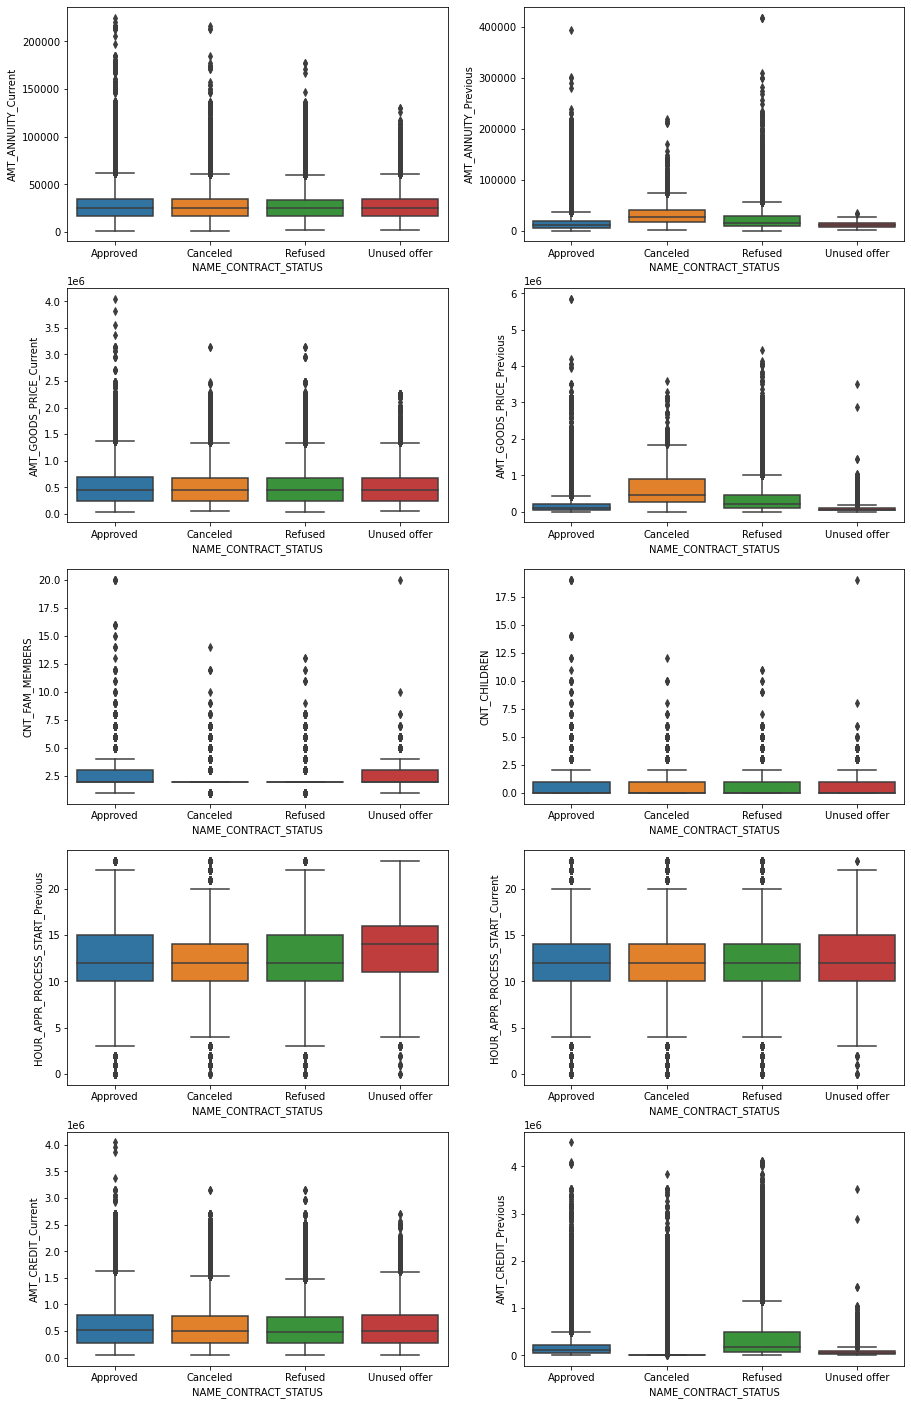

In [116]:
continous_columns=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']
                
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=merged_table[i[1]].dropna(),data=merged_table)
plt.show() 

# Comments for the bivariate numerical analysis 

1. The time spent by banks in unused offers is high compared to other categories
2. Banks should minimize their time spent for unused offers
3. The highest number of approval among families is the nuclear family


#### The target variable for appldata is TARGET
#### The target variable for previous_appldata is NAME_CONTRACT_STATUS

# The major variables to be considered for loan prediction


1. DAYS_EMPLOYED
2. AMT_ANNUITY
3. NAME_INCOME_TYPE
4. CODE_GENDER
5. NAME_HOUSING_TYPE
6. NAME_EDUCATION_TYPE
7. AMT_INCOME_TOTAL
8. DAYS_BIRTH
9. AMT_CREDIT